In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from keybert import KeyBERT
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix

In [13]:
data = pd.read_csv('pwc.txt', sep=',',encoding='latin1',header=None, on_bad_lines='skip')

In [14]:
data

,0
0,Business transformation solutions and insights...
1,Industries
2,Services
3,Issues
4,About us
...,...
374,Learn what steps leaders can take to structure...
375,How we can help: Strategy&s Transformation Ma...
376,Transformation Maturity Profiler
377,Take the Transformation Maturity Profiler


In [16]:
data= data.apply(str)

In [17]:
data=[re.sub('\s+',' ', sent) for sent in data]
data[0]

'0 Business transformation solutions and insights... 1 Industries 2 Services 3 Issues 4 About us ... 374 Learn what steps leaders can take to structure... 375 How we can help: Strategy&\x92s Transformation Ma... 376 Transformation Maturity Profiler 377 Take the Transformation Maturity Profiler 378 Transformation success stories Name: 0, Length: 379, dtype: object'

In [20]:
data=[re.sub('\S*@\S*\s','', sent) for sent in data]
data[0]

'0 Business transformation solutions and insights... 1 Industries 2 Services 3 Issues 4 About us ... 374 Learn what steps leaders can take to structure... 375 How we can help: Strategy&\x92s Transformation Ma... 376 Transformation Maturity Profiler 377 Take the Transformation Maturity Profiler 378 Transformation success stories Name: 0, Length: 379, dtype: object'

In [21]:
data=pd.Series(data)

In [22]:
data_processed= data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0     business transformation solutions and insight...
dtype: object

In [23]:
stop_words= stopwords.words('english')
stop_words.extend(['name','length', 'dtype','object'])

In [24]:
from nltk import word_tokenize

In [25]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)>2]))

In [26]:
data_final

0    business transformation solutions insights ind...
dtype: object

In [27]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)

[('transformation', 5),
 ('take', 2),
 ('maturity', 2),
 ('profiler', 2),
 ('business', 1),
 ('solutions', 1),
 ('insights', 1),
 ('industries', 1),
 ('services', 1),
 ('issues', 1),
 ('learn', 1),
 ('steps', 1),
 ('leaders', 1),
 ('structure', 1),
 ('help', 1),
 ('strategy', 1),
 ('success', 1),
 ('stories', 1)]

In [28]:
words_list

['business',
 'transformation',
 'solutions',
 'insights',
 'industries',
 'services',
 'issues',
 'learn',
 'steps',
 'leaders',
 'take',
 'structure',
 'help',
 'strategy',
 'transformation',
 'transformation',
 'maturity',
 'profiler',
 'take',
 'transformation',
 'maturity',
 'profiler',
 'transformation',
 'success',
 'stories']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'transformation'),
  Text(1, 0, 'take'),
  Text(2, 0, 'maturity'),
  Text(3, 0, 'profiler'),
  Text(4, 0, 'business'),
  Text(5, 0, 'solutions'),
  Text(6, 0, 'insights'),
  Text(7, 0, 'industries'),
  Text(8, 0, 'services'),
  Text(9, 0, 'issues'),
  Text(10, 0, 'learn'),
  Text(11, 0, 'steps'),
  Text(12, 0, 'leaders'),
  Text(13, 0, 'structure'),
  Text(14, 0, 'help'),
  Text(15, 0, 'strategy'),
  Text(16, 0, 'success'),
  Text(17, 0, 'stories')])

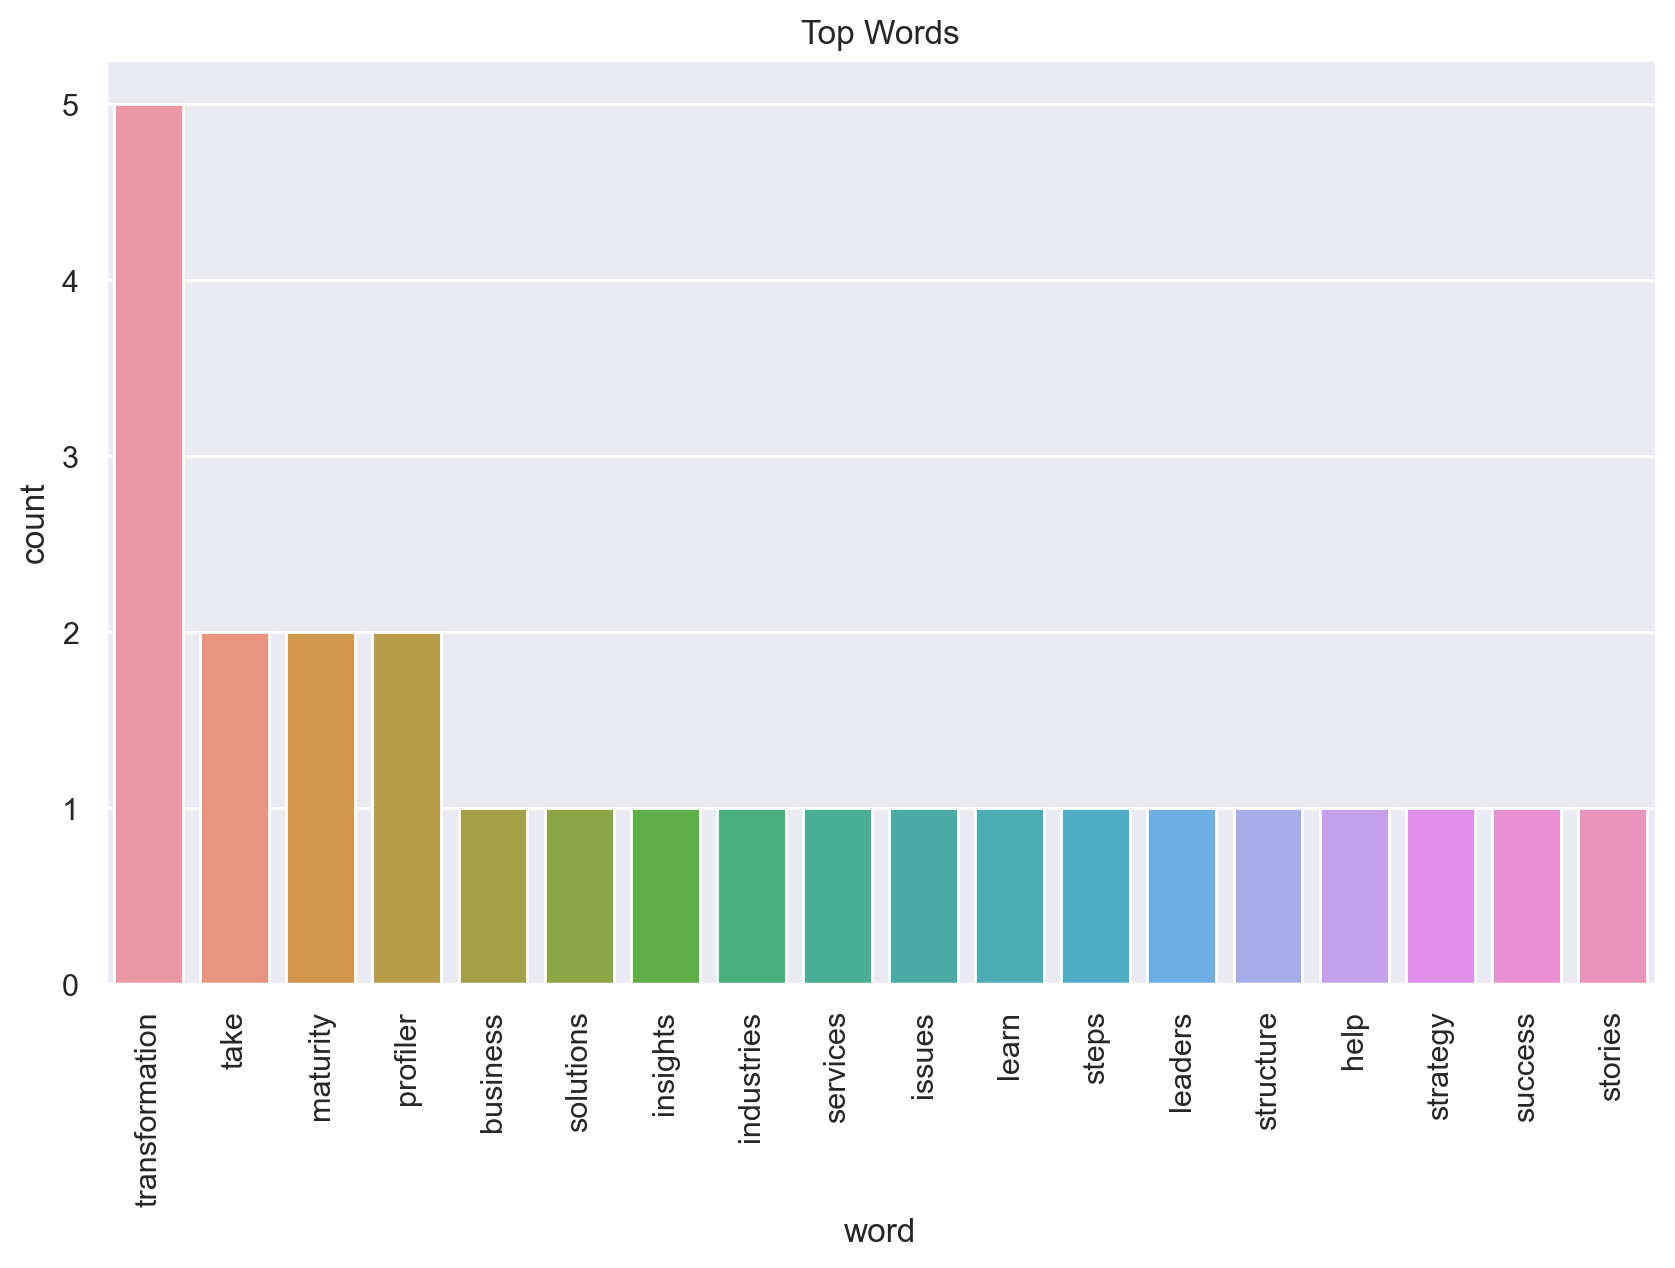

In [29]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp= pd.DataFrame(freq_dist.most_common(30), columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x= 'word', y= 'count', data = temp, ax=ax)
plt.title("Top Words")
plt.xticks(rotation='vertical')

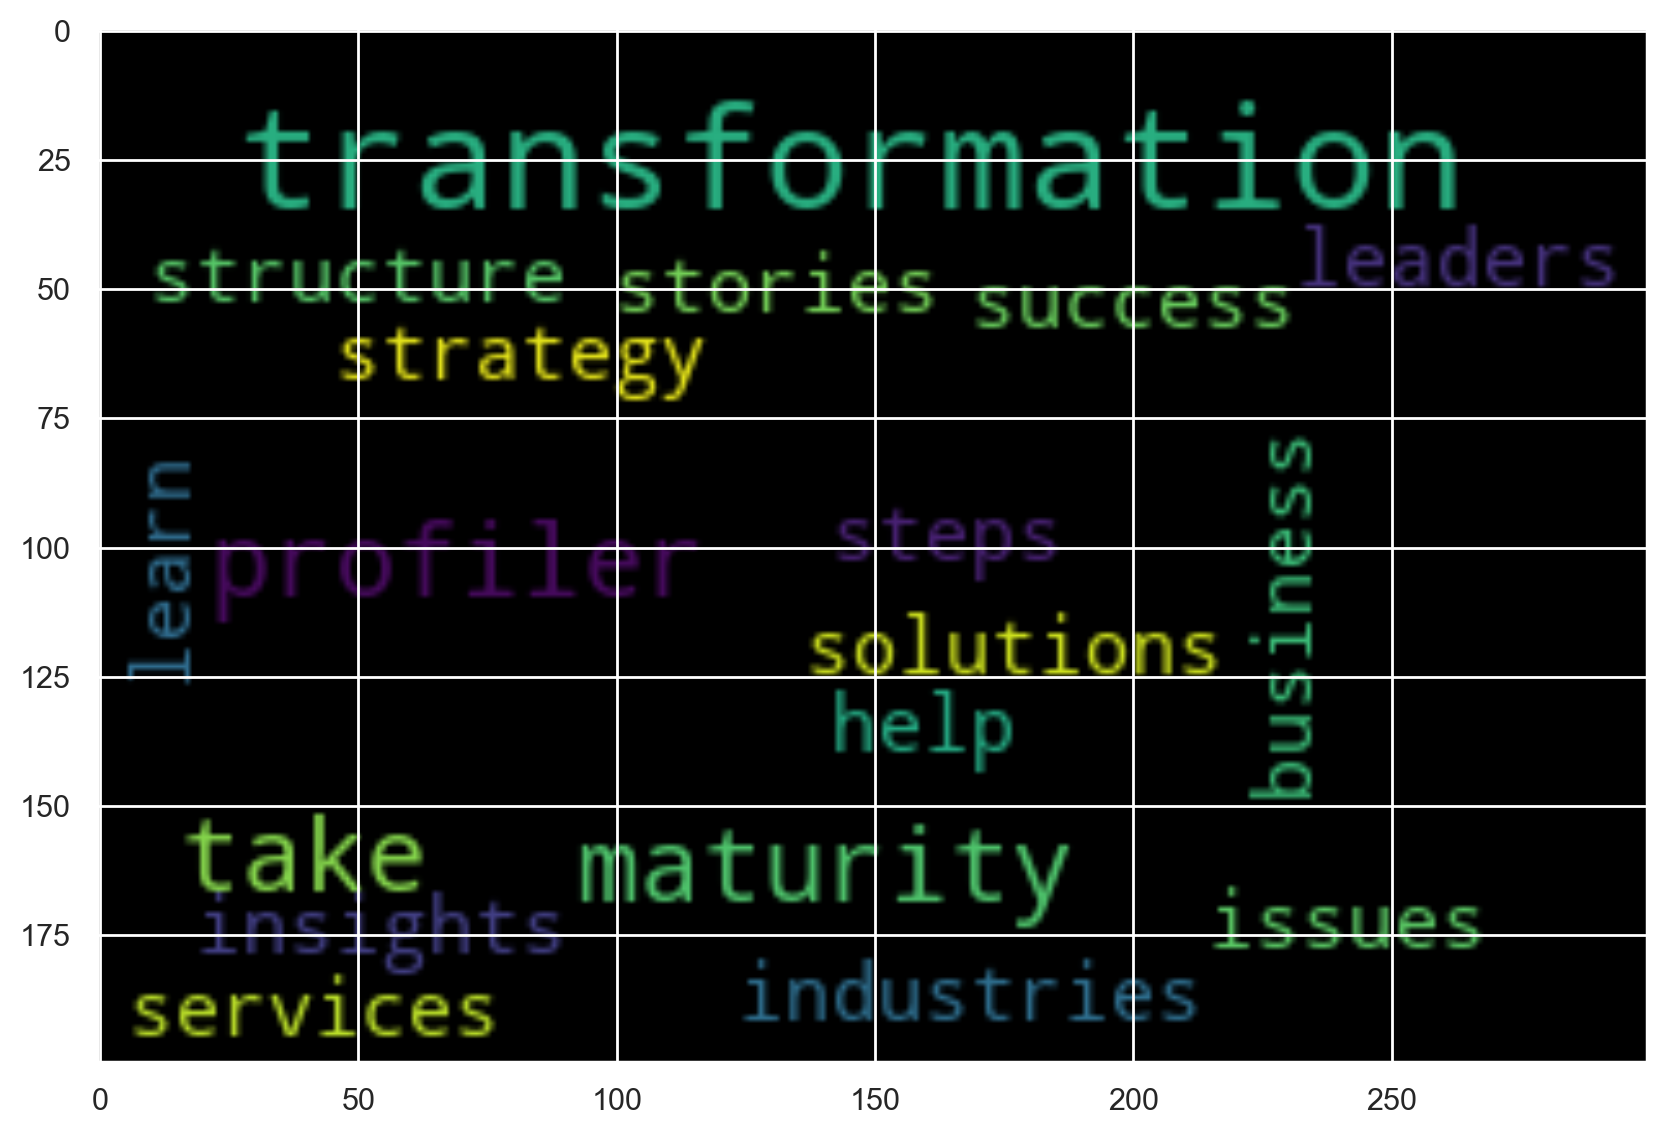

In [30]:
from wordcloud import WordCloud
import wordcloud

wcloud_fig = WordCloud( stopwords = set(wordcloud.STOPWORDS), colormap = 'viridis', width = 300 , height = 200).generate_from_frequencies(freq_dist)

#plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation = 'bilinear')
plt.show()

In [31]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [32]:
words_sent = [x.split() for x in data_final]
words_sent
bigram= Phrases(words_sent, min_count=5, threshold=100)
trigram= Phrases(bigram[words_sent], threshold=100)

bigram_phraser= Phraser(bigram)
trigram_phraser= Phraser(trigram)

#bag of words for creating bigram and trigram

bow=[trigram_phraser[bigram_phraser[word]] for word in words_sent]

In [33]:
bow[0:1]

[['business',
  'transformation',
  'solutions',
  'insights',
  'industries',
  'services',
  'issues',
  'learn',
  'steps',
  'leaders',
  'take',
  'structure',
  'help',
  'strategy',
  'transformation',
  'transformation',
  'maturity',
  'profiler',
  'take',
  'transformation',
  'maturity',
  'profiler',
  'transformation',
  'success',
  'stories']]

In [34]:
import spacy
nlp= spacy.load('en_core_web_sm', disable=['parser','ner'])

In [35]:
doc= nlp(' '.join(bow[0]))
for token in doc:
    print(token, '=>', token.pos_)

business => NOUN
transformation => NOUN
solutions => NOUN
insights => NOUN
industries => NOUN
services => NOUN
issues => NOUN
learn => VERB
steps => NOUN
leaders => NOUN
take => VERB
structure => NOUN
help => NOUN
strategy => NOUN
transformation => NOUN
transformation => NOUN
maturity => NOUN
profiler => NOUN
take => VERB
transformation => NOUN
maturity => NOUN
profiler => NOUN
transformation => NOUN
success => NOUN
stories => NOUN


In [36]:
def lemmatization(texts, tags=['NOUN','ADJ','VERB','ADV','PROPN']):
    texts_out= []
    for sent in texts:
        doc= nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [37]:
bag_of_words = lemmatization(bow)

In [38]:
bag_of_words

[['business',
  'transformation',
  'solution',
  'insight',
  'industry',
  'service',
  'issue',
  'learn',
  'step',
  'leader',
  'take',
  'structure',
  'help',
  'strategy',
  'transformation',
  'transformation',
  'maturity',
  'profiler',
  'take',
  'transformation',
  'maturity',
  'profiler',
  'transformation',
  'success',
  'story']]